In [1]:
import xgboost
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import pycaret

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("diamonds.csv", index_col = 0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
from pycaret.regression import *
setter = setup(data=df, target="price", train_size=0.7, categorical_features = ['cut', 'color', 'clarity'], remove_outliers = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6204
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(53940, 10)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
get_config("X_train")

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
50050,0.78,62.8,56.0,5.90,5.86,3.69,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
46594,0.54,60.3,55.0,5.32,5.26,3.19,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
329,0.72,62.4,58.0,5.83,5.70,3.60,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8611,1.02,63.1,57.0,6.37,6.43,4.04,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29568,0.41,63.2,58.0,4.68,4.72,2.97,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20707,0.31,61.4,59.0,4.35,4.38,2.68,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22327,1.16,59.9,57.0,6.85,6.93,4.13,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14762,1.00,61.6,58.0,6.39,6.43,3.95,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1404,0.25,61.5,56.0,4.04,4.06,2.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
lgb_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,286.6910,299892.0298,547.6240,0.9795,0.1069,0.0840
1,284.7198,285331.3107,534.1641,0.9824,0.1085,0.0821
2,282.0364,301833.2795,549.3936,0.9801,0.1168,0.0853
3,272.9412,264101.1129,513.9077,0.9818,0.1069,0.0818
4,277.9434,243300.8341,493.2553,0.9850,0.1044,0.0820
5,299.4586,306160.5692,553.3178,0.9807,0.1092,0.0854
6,275.0696,361409.4856,601.1734,0.9765,0.1083,0.0809
7,319.4104,363404.2480,602.8302,0.9767,0.1114,0.0874
8,299.0868,341503.2659,584.3828,0.9776,0.1109,0.0858
9,270.5553,287149.3964,535.8632,0.9813,0.1096,0.0839


In [7]:
predict_model(lgb_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,281.1116,296373.3966,544.4019,0.9806,0.107,0.0828


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,Label
0,1.51,61.6,60.0,7.34,7.27,4.50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10485.0,7480.0753
1,1.51,61.8,56.0,7.46,7.32,4.57,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12899.0,13869.9915
2,0.44,61.5,56.0,4.90,4.92,3.02,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1081.0,1111.9710
3,0.54,61.3,57.0,5.28,5.25,3.23,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1572.0,1735.9796
4,1.20,62.5,55.0,6.84,6.79,4.26,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4536.0,5128.4287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,0.39,60.7,61.0,4.73,4.70,2.86,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1024.0,1039.6905
4608,0.32,61.8,55.0,4.42,4.38,2.72,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,612.0,630.3146
4609,1.07,61.7,57.0,6.59,6.56,4.06,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4374.0,4871.4694
4610,0.90,62.5,58.0,6.10,6.15,3.83,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4961.0,4980.3910


In [8]:
get_config("X_test")

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
22462,1.51,61.6,60.0,7.34,7.27,4.50,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24590,1.51,61.8,56.0,7.46,7.32,4.57,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39568,0.44,61.5,56.0,4.90,4.92,3.02,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44234,0.54,61.3,57.0,5.28,5.25,3.23,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9128,1.20,62.5,55.0,6.84,6.79,4.26,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38396,0.39,60.7,61.0,4.73,4.70,2.86,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17391,0.32,61.8,55.0,4.42,4.38,2.72,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8244,1.07,61.7,57.0,6.59,6.56,4.06,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11216,0.90,62.5,58.0,6.10,6.15,3.83,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


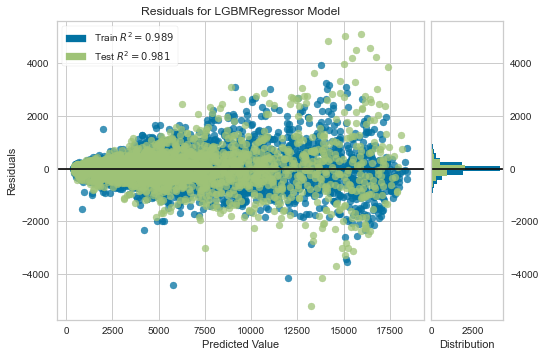

In [9]:
plot_model(xgb_model, plot='residuals')

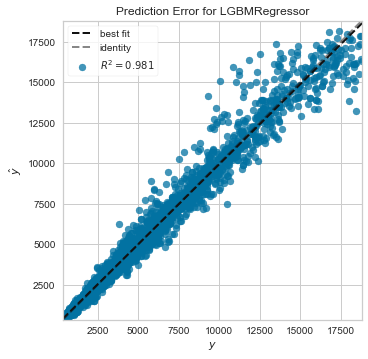

In [10]:
plot_model(xgb_model, plot="error")

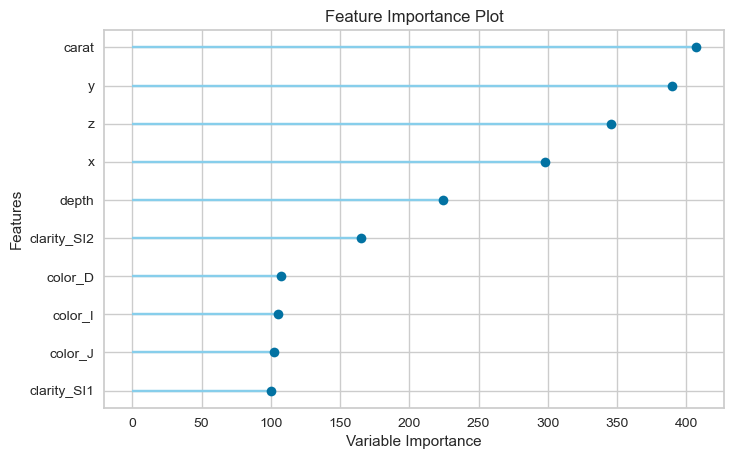

In [11]:
plot_model(xgb_model, plot="feature")

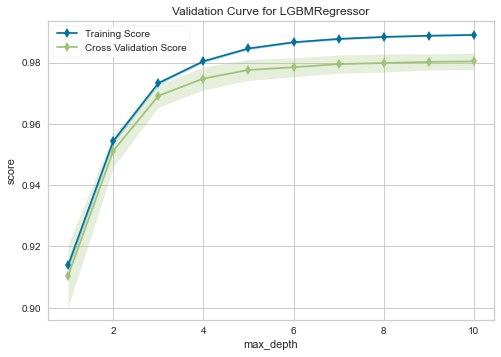

In [13]:
plot_model(xgb_model, plot='vc')

In [14]:
plot_model(xgb_model, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0
n_estimators,100
